# Task overview:


Liquidity Risk:  The task centers around predicting the cost of selling a security. In Asset Management, we always need to ensure that the portfolio has enough liquidity such that, should we have to sell a large amount of assets, not too large a cost would be incurred. 

So we have function $C = F(v,t)$ where 
* $v =$ volume ($x10^8$ \$M)
* $t =$ time horizon (days)
* $C =$ Liquidation Cost (%)

where liquidation cost here is the percentage cost of liquidating an asset based on time, volume (and other exogenous market factors)

More precisely we are given:
$$C = \alpha +  \begin{bmatrix}
    \beta_1 \\
    \beta_2
  \end{bmatrix} \cdot \begin{bmatrix} v \; \; t \end{bmatrix} + \epsilon $$


#### Rapid Fire Thoughts
1. First determine what the cost column is in the mins and hours data
1. Check for erroneous data
1. Correlation plots to see if any clear patterns between volume/time features and cost
1. Check for collinearity 
1. Possibly automated time series feature extraction with TS Fresh
1. For simplicity structure this as supervised learning problem with lag i.e. where $x$ is row in X which is an $n\times m$ matrix with $x = [a_1, a_2, a_3, \dots b_2, b_3]$ and $\hat{y}=[t_5]$  
1. Quickly reference some research papers for possible signals i.e. lags, sin/cos on time etc.

In [28]:
from pandas_profiling import ProfileReport
import etl 
import pandas as pd
import numpy as np
ticker_df, lob_df = etl.get_data()
ticker_profile = ProfileReport(ticker_df, title="Pandas Profiling Report - Minutes Data")
lob_profile = ProfileReport(lob_df, title="Pandas Profiling Report - Hours Data")

In [2]:
bids, asks = etl.denorm_order_book(lob_df,"Bid"), etl.denorm_order_book(lob_df,"Ask")

In [3]:
def custom_round(x, base=5):
    return int(base * round(float(x)/base))

for df in [bids,asks]:
    df.rename({"Time_Minute":"Time"},axis=1, inplace=True)
    df["Time"] = pd.to_datetime(df["Time"])
    df.index = df["Time"]
    df.drop("Time",axis=1, inplace=True)

In [4]:
bids["BidSize"] = bids["BidSize"].apply(lambda x: custom_round(x, base=100))
asks["AskSize"] = asks["AskSize"].apply(lambda x: custom_round(x, base=100))

asks["Price"].apply(lambda x: custom_round(x, base=1))
asks["AskSize"] = asks["AskSize"].apply(lambda x: custom_round(x, base=100))

In [10]:
results = bids.merge(asks)

In [36]:
grouped["BidSize"] = grouped["BidSize"] * -1

<AxesSubplot:xlabel='Price'>

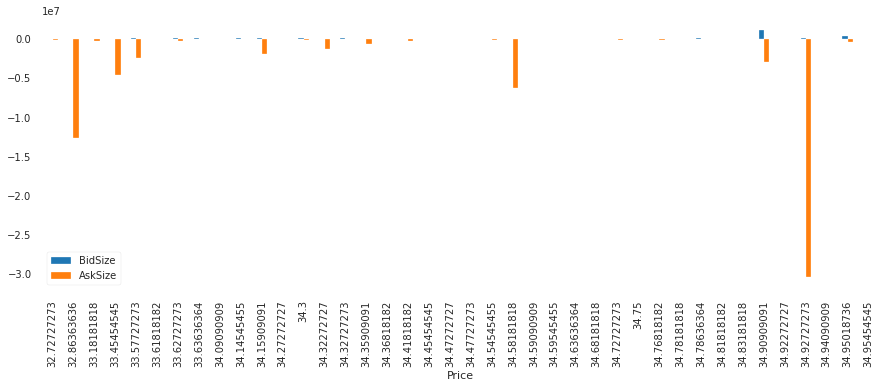

In [37]:
grouped = results.groupby("Price").mean()
grouped["AskSize"] = grouped["AskSize"] * -1
grouped.head(40).plot.bar(figsize=(15,5))

<ipython-input-42-b9b0d660fdfd>:1: RuntimeWarning: invalid value encountered in double_scalars
  grouped["percent_diff"] = grouped[['AskSize', 'BidSize']].apply(lambda row: (row.iloc[0]-row.iloc[1])/row.iloc[0]*100, axis=1)
<ipython-input-42-b9b0d660fdfd>:1: RuntimeWarning: divide by zero encountered in double_scalars
  grouped["percent_diff"] = grouped[['AskSize', 'BidSize']].apply(lambda row: (row.iloc[0]-row.iloc[1])/row.iloc[0]*100, axis=1)


<AxesSubplot:xlabel='Price'>

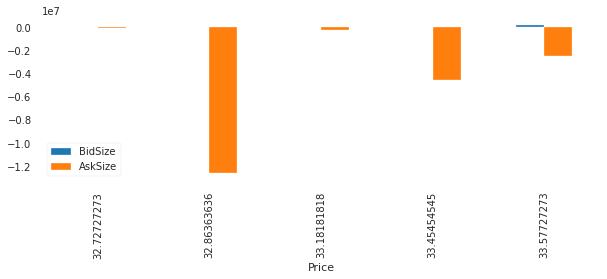

In [57]:
grouped["percent_diff"] = grouped[['AskSize', 'BidSize']].apply(lambda row: (row.iloc[0]-row.iloc[1])/row.iloc[0]*100, axis=1)

<AxesSubplot:xlabel='Price'>

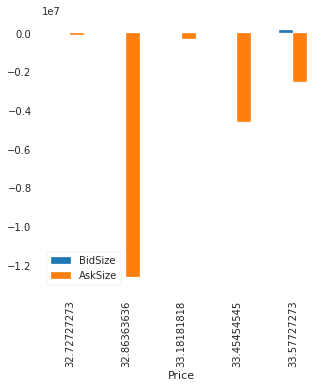

In [60]:
grouped[grouped["percent_diff"] < 115].head().drop("percent_diff",axis=1).plot.bar(figsize=(5,5))

In [65]:
#ticker_profile

In [66]:
lob_profile

KeyboardInterrupt: 